# Загрузка данных

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Данные взяты с сайта kaggle
[данные о продажах маркетплейса Amazon](https://www.kaggle.com/datasets/ammaraahmad/us-ecommerce-record-2020)

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Аналитика портфолио/amazon_market_data.csv')


In [ ]:
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [ ]:
df.columns

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Приведение столбцов к стилю camel_case

In [4]:
# Функция для преобразования в camelCase
def to_camel_case(s):
    parts = s.split()
    return parts[0].lower() + ''.join(part.capitalize() for part in parts[1:])

# Применяем функцию ко всем столбцам DataFrame
df.columns = [to_camel_case(col) for col in df.columns]

# Проверяем результат
print(df.columns)

Index(['orderDate', 'rowId', 'orderId', 'shipMode', 'customerId', 'segment',
       'country', 'city', 'state', 'postalCode', 'region', 'productId',
       'category', 'sub-category', 'productName', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')


# Приведение типов данных

In [5]:
# Приведем столбец 'OrderDate' к типу datetime
df['orderDate'] = pd.to_datetime(df['orderDate'])



<ipython-input-5-a6303286f4e3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['orderDate'] = pd.to_datetime(df['orderDate'])


In [6]:
df['orderDate']


,orderDate
0,2020-01-01
1,2020-01-01
2,2020-01-01
3,2020-01-01
4,2020-01-01
...,...
3307,2020-12-30
3308,2020-12-30
3309,2020-12-30
3310,2020-12-30


# Поиск дублей и пропусков в данных

In [7]:
# Поиск дубликатов
duplicates = df[df.duplicated(keep=False)]  # keep=False показывает все дубликаты
print("Дубликаты:")
print(duplicates)

# Поиск пропусков
missing_values = df.isnull().sum()  # Считает количество пропусков в каждом столбце
missing_values = missing_values[missing_values > 0]  # Оставляет только столбцы с пропусками
print("\nПропуски:")
print(missing_values)

# Дополнительно: Вывод общего количества дубликатов и пропусков
total_duplicates = df.duplicated().sum()
total_missing = missing_values.sum()

print(f"\nОбщее количество дубликатов: {total_duplicates}")
print(f"Общее количество пропусков: {total_missing}")

Дубликаты:
Empty DataFrame
Columns: [orderDate, rowId, orderId, shipMode, customerId, segment, country, city, state, postalCode, region, productId, category, sub-category, productName, sales, quantity, discount, profit]
Index: []

Пропуски:
Series([], dtype: int64)

Общее количество дубликатов: 0
Общее количество пропусков: 0


# Исследовательский анализ данных

In [8]:
# Подсчитаем уникальные заказы по orderId
unique_orders_count = df['orderId'].nunique()

print(f"Количество уникальных заказов: {unique_orders_count}")

Количество уникальных заказов: 1687


In [9]:
# Подсчитаем уникальных клиентов по customerId
unique_customers_count = df['customerId'].nunique()

print(f"Количество уникальных клиентов: {unique_customers_count}")

Количество уникальных клиентов: 693


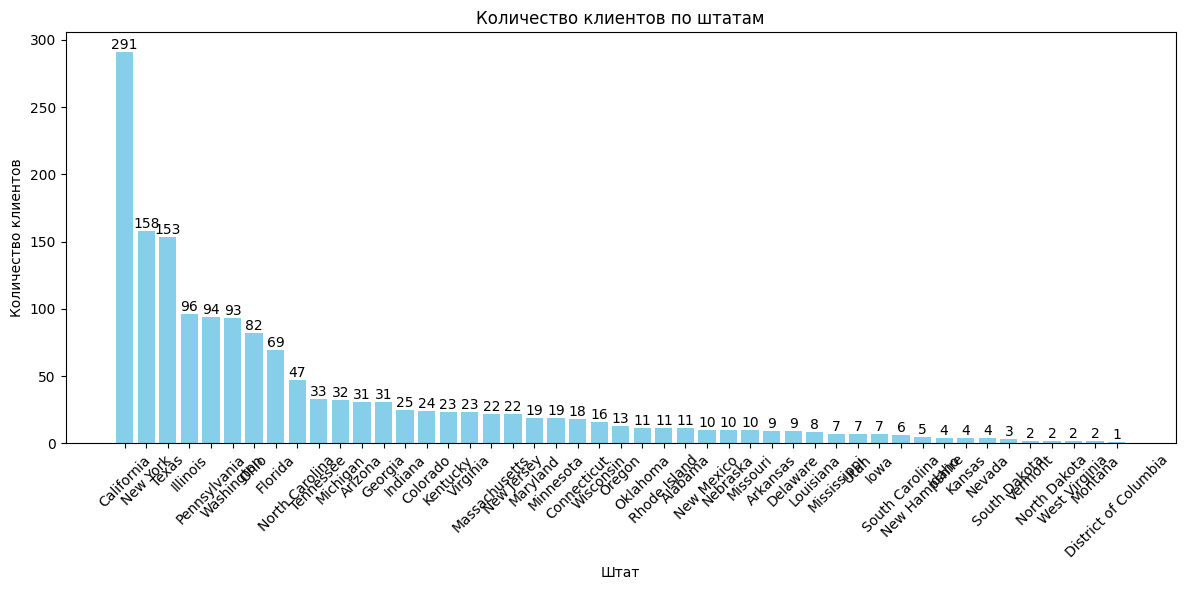

In [10]:
# изучим локацию клиентов по штатам

import pandas as pd
import matplotlib.pyplot as plt


# Группируем данные по штатам и считаем количество уникальных клиентов
customer_counts = df.groupby('state')['customerId'].nunique().reset_index()

# Переименовываем столбцы для удобства
customer_counts.columns = ['state', 'customer_count']

# Сортируем по количеству клиентов по убыванию
customer_counts = customer_counts.sort_values(by='customer_count', ascending=False)

# Создаем столбчатую диаграмму
plt.figure(figsize=(12, 6))
plt.bar(customer_counts['state'], customer_counts['customer_count'], color='skyblue')

# Подписываем значения над столбцами
for index, value in enumerate(customer_counts['customer_count']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Добавляем заголовок и метки осей
plt.title('Количество клиентов по штатам')
plt.xlabel('Штат')
plt.ylabel('Количество клиентов')

# Поворачиваем метки по оси X для удобства чтения
plt.xticks(rotation=45)

# Показываем график
plt.tight_layout()
plt.show()

Наибольшее количество покупателей из штатов Калифорния, Нью-Йорк и Техас.

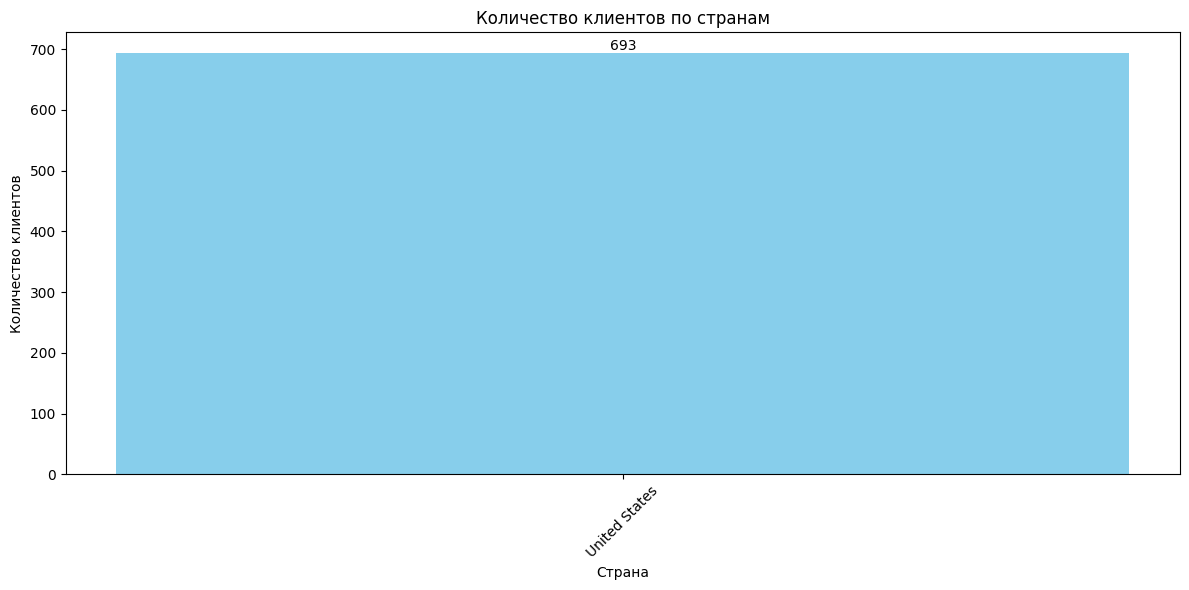

In [ ]:
# изучим локацию пользователей по странам

import pandas as pd
import matplotlib.pyplot as plt

# Пример загрузки данных в DataFrame (замените на ваш собственный код загрузки)
# df = pd.read_csv('your_data.csv')

# Группируем данные по стране и считаем количество уникальных клиентов
customer_counts = df.groupby('country')['customerId'].nunique().reset_index()

# Переименовываем столбцы для удобства
customer_counts.columns = ['country', 'customer_count']

# Сортируем по количеству клиентов по убыванию
customer_counts = customer_counts.sort_values(by='customer_count', ascending=False)

# Создаем столбчатую диаграмму
plt.figure(figsize=(12, 6))
plt.bar(customer_counts['country'], customer_counts['customer_count'], color='skyblue')

# Подписываем значения над столбцами
for index, value in enumerate(customer_counts['customer_count']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Добавляем заголовок и метки осей
plt.title('Количество клиентов по странам')
plt.xlabel('Страна')
plt.ylabel('Количество клиентов')

# Поворачиваем метки по оси X для удобства чтения
plt.xticks(rotation=45)

# Показываем график
plt.tight_layout()
plt.show()

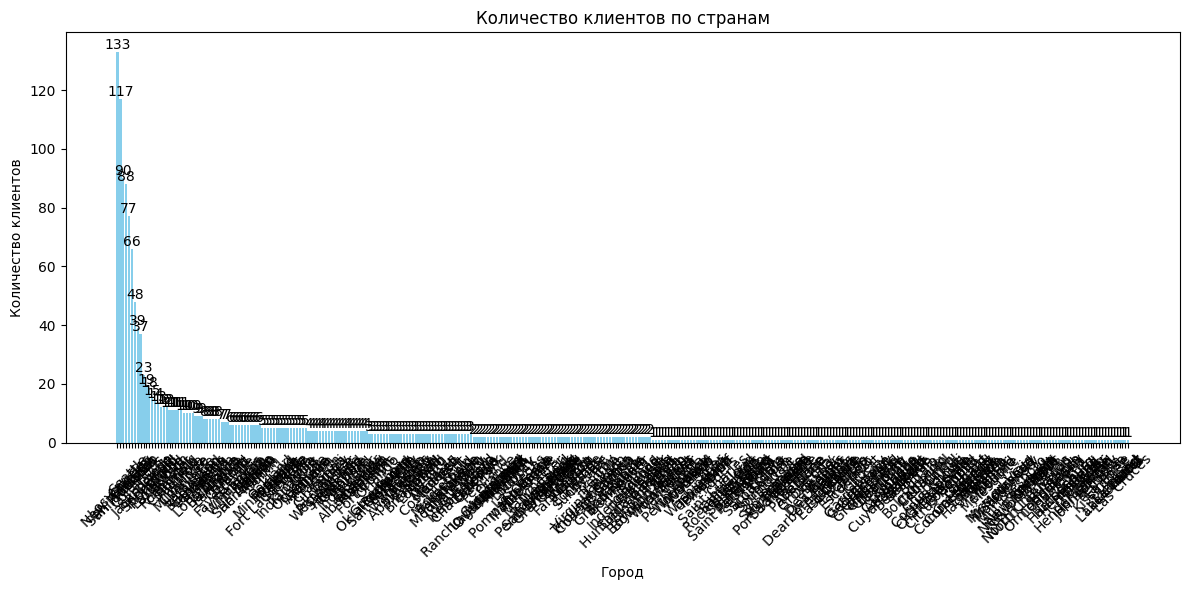

In [ ]:
# изучим локацию пользователей по городам

import pandas as pd
import matplotlib.pyplot as plt

# Пример загрузки данных в DataFrame (замените на ваш собственный код загрузки)
# df = pd.read_csv('your_data.csv')

# Группируем данные по стране и считаем количество уникальных клиентов
customer_counts = df.groupby('city')['customerId'].nunique().reset_index()

# Переименовываем столбцы для удобства
customer_counts.columns = ['city', 'customer_count']

# Сортируем по количеству клиентов по убыванию
customer_counts = customer_counts.sort_values(by='customer_count', ascending=False)

# Создаем столбчатую диаграмму
plt.figure(figsize=(12, 6))
plt.bar(customer_counts['city'], customer_counts['customer_count'], color='skyblue')

# Подписываем значения над столбцами
for index, value in enumerate(customer_counts['customer_count']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Добавляем заголовок и метки осей
plt.title('Количество клиентов по городам')
plt.xlabel('Город')
plt.ylabel('Количество клиентов')

# Поворачиваем метки по оси X для удобства чтения
plt.xticks(rotation=45)

# Показываем график
plt.tight_layout()
plt.show()

График получился не читаемым, сгруппируем города, у которых менее 10 клиентов в группу прочие.

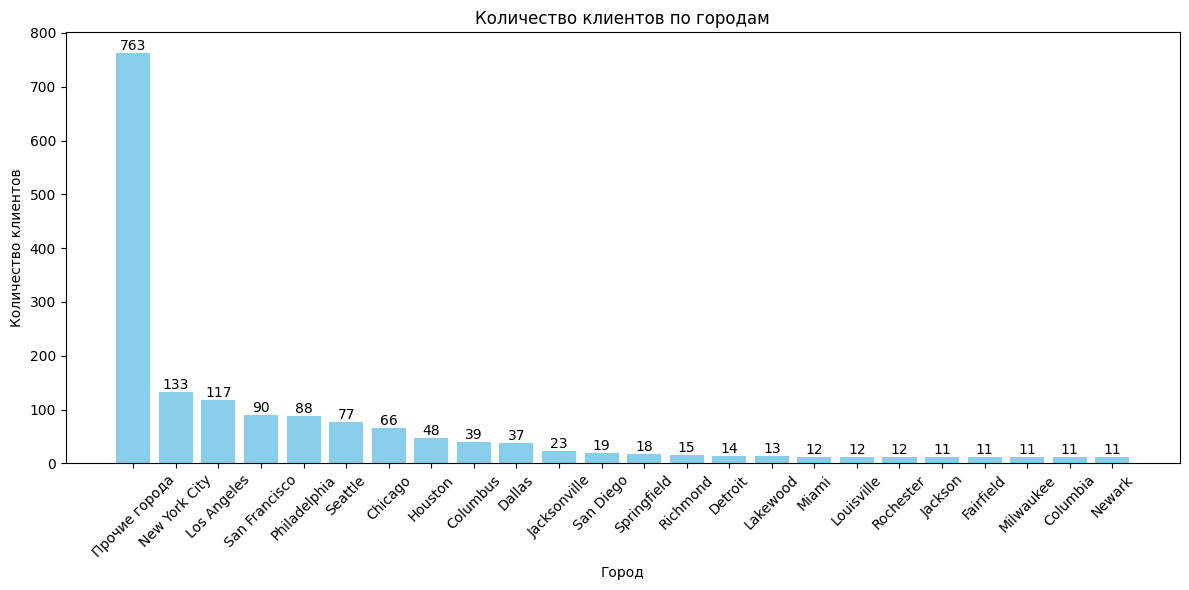

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Пример загрузки данных в DataFrame (замените на ваш собственный код загрузки)
# df = pd.read_csv('your_data.csv')

# Группируем данные по городу и считаем количество уникальных клиентов
customer_counts = df.groupby('city')['customerId'].nunique().reset_index()

# Переименовываем столбцы для удобства
customer_counts.columns = ['city', 'customer_count']

# Объединяем города с количеством клиентов менее 5 в одну группу "Прочие города"
customer_counts['city'] = customer_counts.apply(
    lambda row: row['city'] if row['customer_count'] > 10 else 'Прочие города',
    axis=1
)

# Считаем количество клиентов по новой категории
customer_counts = customer_counts.groupby('city')['customer_count'].sum().reset_index()

# Сортируем по количеству клиентов по убыванию
customer_counts = customer_counts.sort_values(by='customer_count', ascending=False)

# Создаем столбчатую диаграмму
plt.figure(figsize=(12, 6))
plt.bar(customer_counts['city'], customer_counts['customer_count'], color='skyblue')

# Подписываем значения над столбцами
for index, value in enumerate(customer_counts['customer_count']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Добавляем заголовок и метки осей
plt.title('Количество клиентов по городам')
plt.xlabel('Город')
plt.ylabel('Количество клиентов')

# Поворачиваем метки по оси X для удобства чтения
plt.xticks(rotation=45)

# Показываем график
plt.tight_layout()
plt.show()

In [ ]:
Таким образом, большее количество клиентов в городах Нью-Йорк, Лос-Анджелес, Сан-Франциско, Филадельфия.

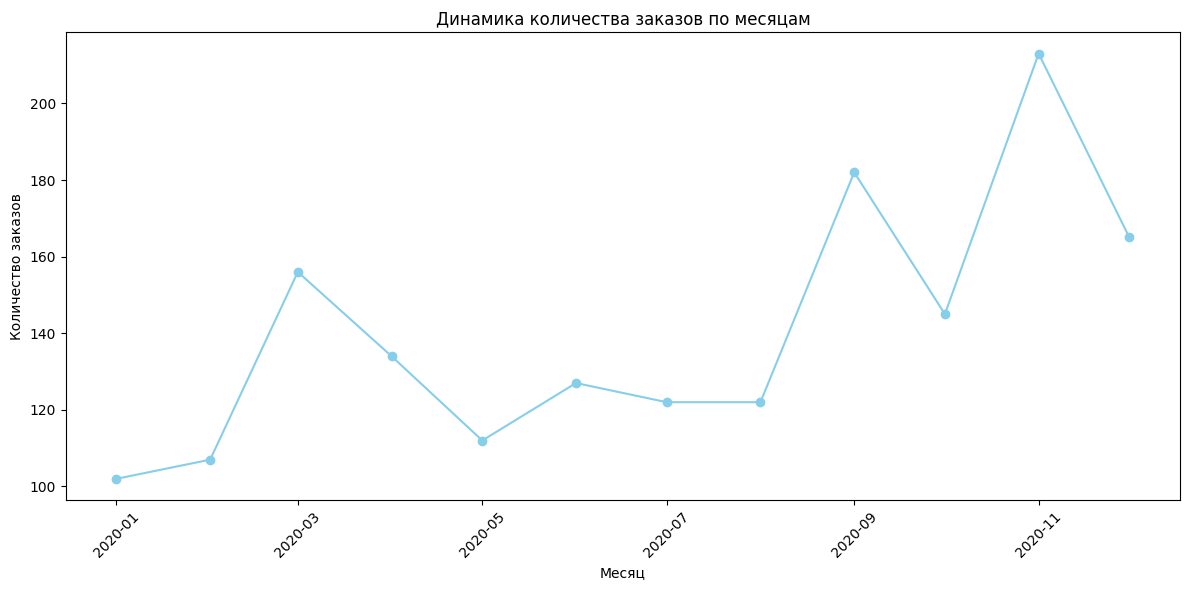

In [ ]:
# изучим динамику кол-ва заказов по дате заказов
import pandas as pd
import matplotlib.pyplot as plt

# Пример загрузки данных в DataFrame (замените на ваш собственный код загрузки)
# df = pd.read_csv('your_data.csv')

# Преобразуем поле 'orderDate' в формат datetime
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Усечем дату до месяца (оставим только год и месяц)
df['month'] = df['orderDate'].dt.to_period('M')

# Сгруппируем данные по месяцам и посчитаем количество заказов
orders_by_month = df.groupby('month')['orderId'].nunique().reset_index()

# Переименуем колонки для удобства
orders_by_month.columns = ['month', 'order_count']

# Преобразуем период обратно в дату для построения графика
orders_by_month['month'] = orders_by_month['month'].dt.to_timestamp()

# Построим график
plt.figure(figsize=(12, 6))
plt.plot(orders_by_month['month'], orders_by_month['order_count'], marker='o', linestyle='-', color='skyblue')

# Добавим заголовок и метки осей
plt.title('Динамика количества заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')

# Поворачиваем метки по оси X для удобства чтения
plt.xticks(rotation=45)

# Показываем график
plt.tight_layout()
plt.show()

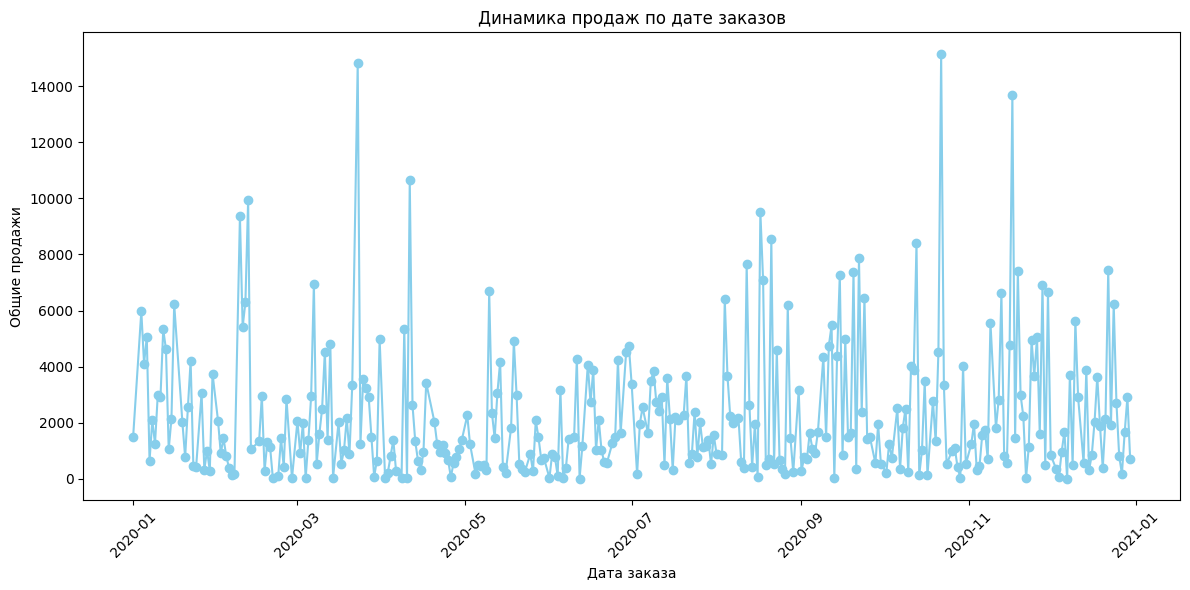

In [ ]:
# изучтиь динамику продаж по дате заказов
import pandas as pd
import matplotlib.pyplot as plt

# Пример загрузки данных в DataFrame (замените на ваш собственный код загрузки)
# df = pd.read_csv('your_data.csv')

# Преобразуем поле 'orderDate' в формат datetime
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Сгруппируем данные по дате заказа и посчитаем общие продажи
sales_by_date = df.groupby('orderDate')['sales'].sum().reset_index()

# Построим график
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date['orderDate'], sales_by_date['sales'], marker='o', linestyle='-', color='skyblue')

# Добавим заголовок и метки осей
plt.title('Динамика продаж по дате заказов')
plt.xlabel('Дата заказа')
plt.ylabel('Общие продажи')

# Поворачиваем метки по оси X для удобства чтения
plt.xticks(rotation=45)

# Показываем график
plt.tight_layout()
plt.show()

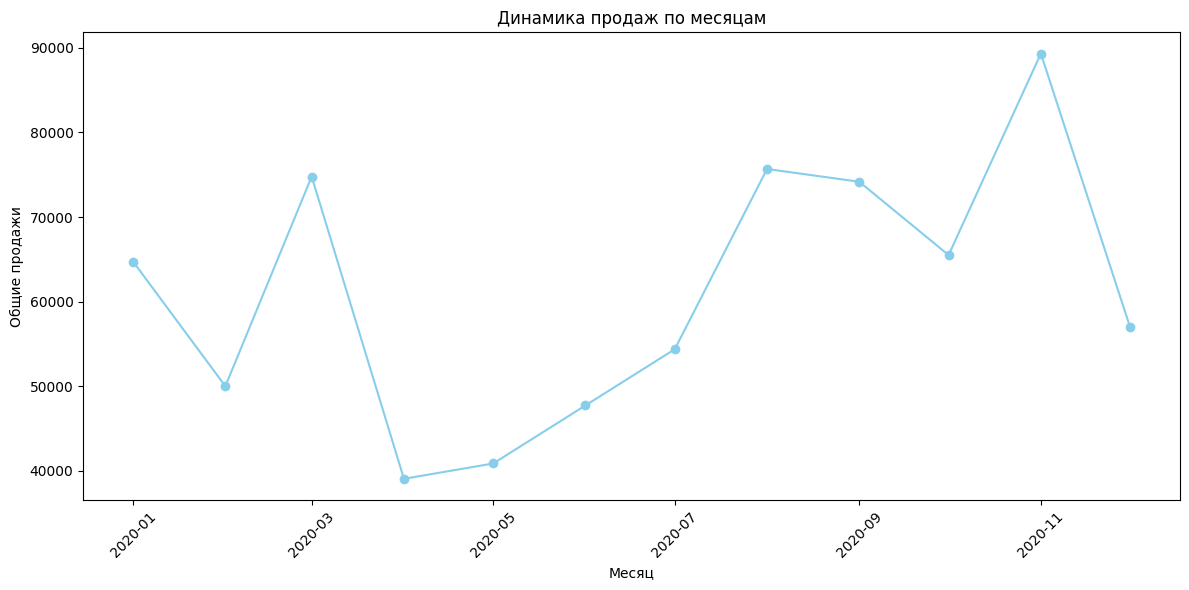

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Пример загрузки данных в DataFrame (замените на ваш собственный код загрузки)
# df = pd.read_csv('your_data.csv')

# Преобразуем поле 'orderDate' в формат datetime
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Усечем дату до месяца (оставим только год и месяц)
df['month'] = df['orderDate'].dt.to_period('M')

# Сгруппируем данные по месяцам и посчитаем общие продажи
sales_by_month = df.groupby('month')['sales'].sum().reset_index()

# Преобразуем период обратно в дату для построения графика
sales_by_month['month'] = sales_by_month['month'].dt.to_timestamp()

# Построим график
plt.figure(figsize=(12, 6))
plt.plot(sales_by_month['month'], sales_by_month['sales'], marker='o', linestyle='-', color='skyblue')

# Добавим заголовок и метки осей
plt.title('Динамика продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Общие продажи')

# Поворачиваем метки по оси X для удобства чтения
plt.xticks(rotation=45)

# Показываем график
plt.tight_layout()
plt.show()

In [ ]:
# изучть распределение продаж по категориям заказов

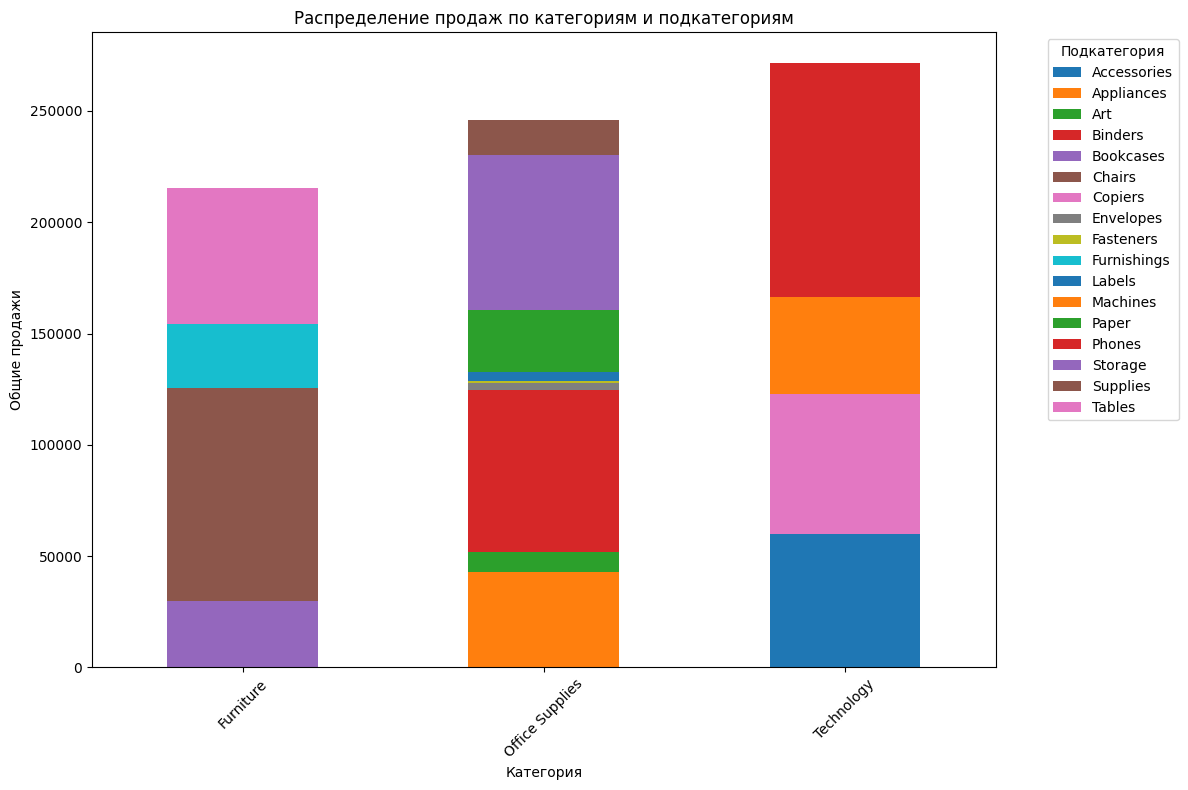

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что ваш DataFrame называется df
# df = pd.read_csv('ваш_файл.csv')  # Если данные загружаются из CSV

# Создаем сводную таблицу по категориям и подкатегориям
pivot_table = df.pivot_table(values='sales', index='category', columns='sub-category', aggfunc='sum', fill_value=0)

# Отображаем сводную таблицу
#print(pivot_table)

# Построение графика
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))

# Настройки графика
plt.title('Распределение продаж по категориям и подкатегориям')
plt.xlabel('Категория')
plt.ylabel('Общие продажи')
plt.legend(title='Подкатегория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Показать график
plt.show()

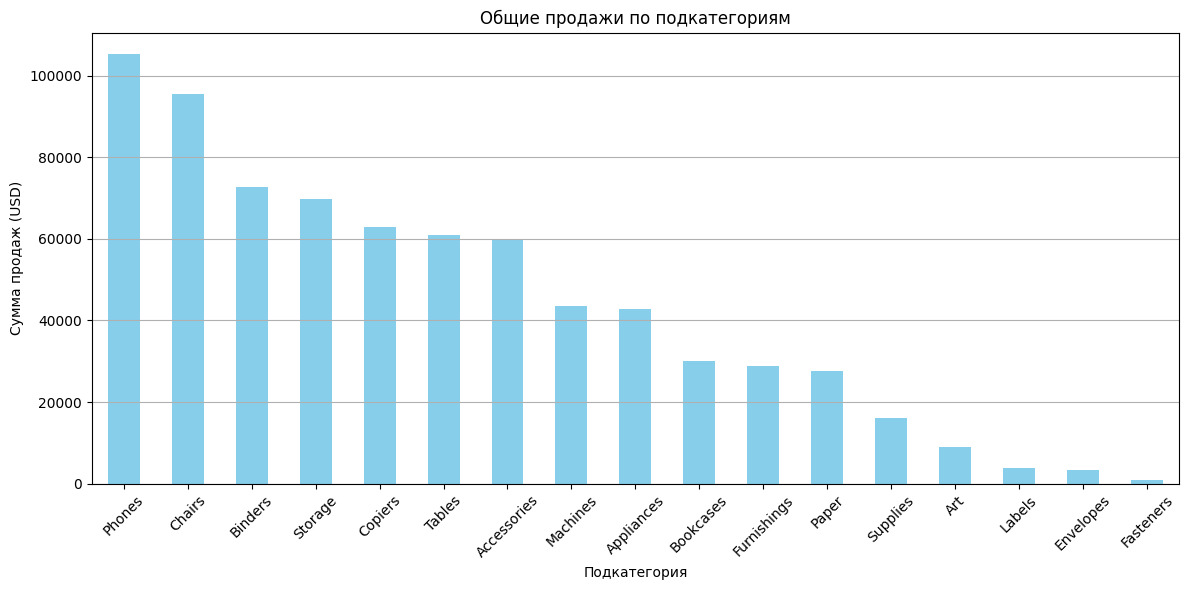

In [11]:
# изучть распределение продаж по подкатегориям заказов
import pandas as pd
import matplotlib.pyplot as plt



# Группировка по подкатегориям и суммирование продаж
sub_category_sales = df.groupby('sub-category')['sales'].sum().sort_values(ascending=False)

# Построение гистограммы
plt.figure(figsize=(12, 6))
sub_category_sales.plot(kind='bar', color='skyblue')

# Настройка заголовка и меток
plt.title('Общие продажи по подкатегориям')
plt.xlabel('Подкатегория')
plt.ylabel('Сумма продаж (USD)')
plt.xticks(rotation=45)  # Повернуть метки по оси X для лучшей читаемости

plt.grid(axis='y')  # Сетка по оси Y
plt.tight_layout()  # Автоматически подгоняет размеры графика
plt.show()

In [ ]:
# изучить распределение продаж по городам (штатам)

                sales
city                 
Aberdeen       25.500
Abilene         1.392
Akron        1327.300
Albuquerque  1604.668
Alexandria     25.060
...               ...
Woodstock       2.912
Woonsocket     91.140
Yonkers       775.210
York          103.480
Yuma          599.985

[350 rows x 1 columns]


<Figure size 1200x600 with 0 Axes>

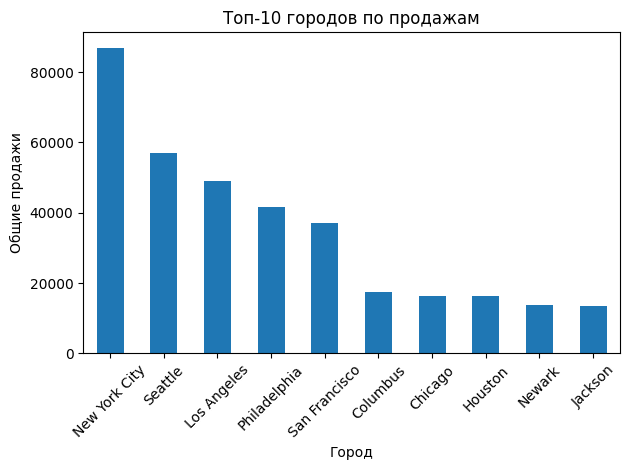

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что ваш DataFrame называется df
# df = pd.read_csv('ваш_файл.csv')  # Если данные загружаются из CSV

# Создаем сводную таблицу по городам
pivot_table_cities = df.pivot_table(values='sales', index='city', aggfunc='sum', fill_value=0)

# Отображаем сводную таблицу
print(pivot_table_cities)

# Построение графика для городов
plt.figure(figsize=(12, 6))
pivot_table_cities.sort_values(by='sales', ascending=False).head(10).plot(kind='bar', legend=False)

# Настройки графика
plt.title('Топ-10 городов по продажам')
plt.xlabel('Город')
plt.ylabel('Общие продажи')
plt.xticks(rotation=45)
plt.tight_layout()

# Показать график
plt.show()

<Figure size 1200x600 with 0 Axes>

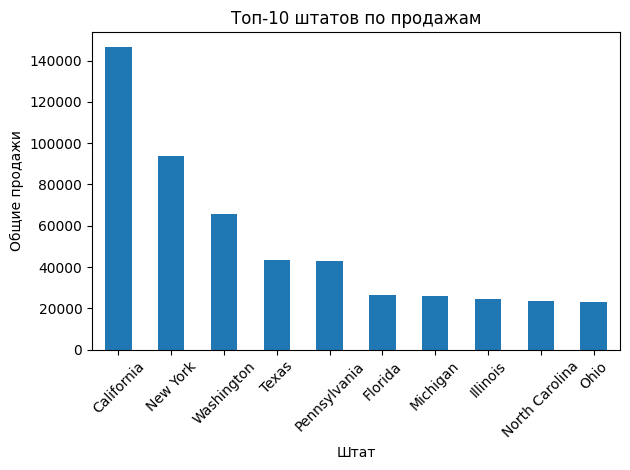

In [ ]:
pivot_table_states = df.pivot_table(values='sales', index='state', aggfunc='sum', fill_value=0)

# Отображаем сводную таблицу
#print(pivot_table_states)

# Построение графика для топ-10 штатов
plt.figure(figsize=(12, 6))
pivot_table_states.sort_values(by='sales', ascending=False).head(10).plot(kind='bar', legend=False)

# Настройки графика
plt.title('Топ-10 штатов по продажам')
plt.xlabel('Штат')
plt.ylabel('Общие продажи')
plt.xticks(rotation=45)
plt.tight_layout()

# Показать график
plt.show()

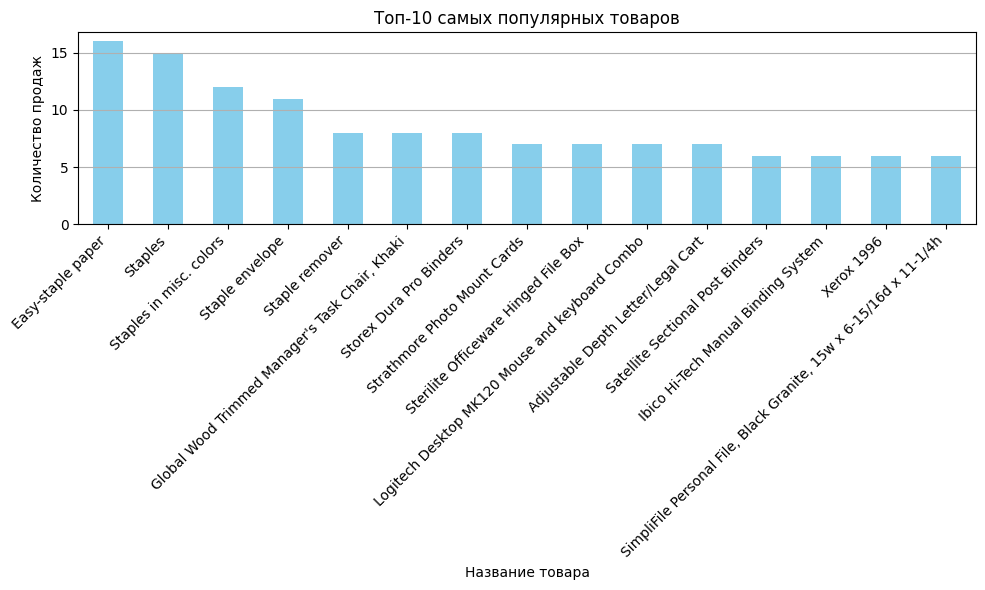

In [ ]:
# найти самые популярные товары (Product Name)
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что вы уже загрузили данные в DataFrame df
# df = pd.read_csv('ваш_файл.csv')  # Пример загрузки данных

# Находим топ-10 самых популярных товаров по количеству продаж
top_products = df['productName'].value_counts().head(15)

# Создаем диаграмму
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Топ-15 самых популярных товаров')
plt.xlabel('Название товара')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Показать диаграмму
plt.tight_layout()  # Чтобы избежать обрезания меток
plt.show()

category              Furniture  Office Supplies  Technology
state                                                       
California                  140              403         120
New York                     77              200          75
Texas                        56              214          47
Washington                   48              123          44
Pennsylvania                 49              108          40
Illinois                     43               99          30
Ohio                         27               96          38
Florida                      31               73          22
North Carolina               14               53          18
Tennessee                    22               48          11
Arizona                      14               38          18
Michigan                     18               36          13
Georgia                      10               38          14
Colorado                     15               33          13
Indiana                 

<ipython-input-34-c5449f22d0cc>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(category_distribution.columns))


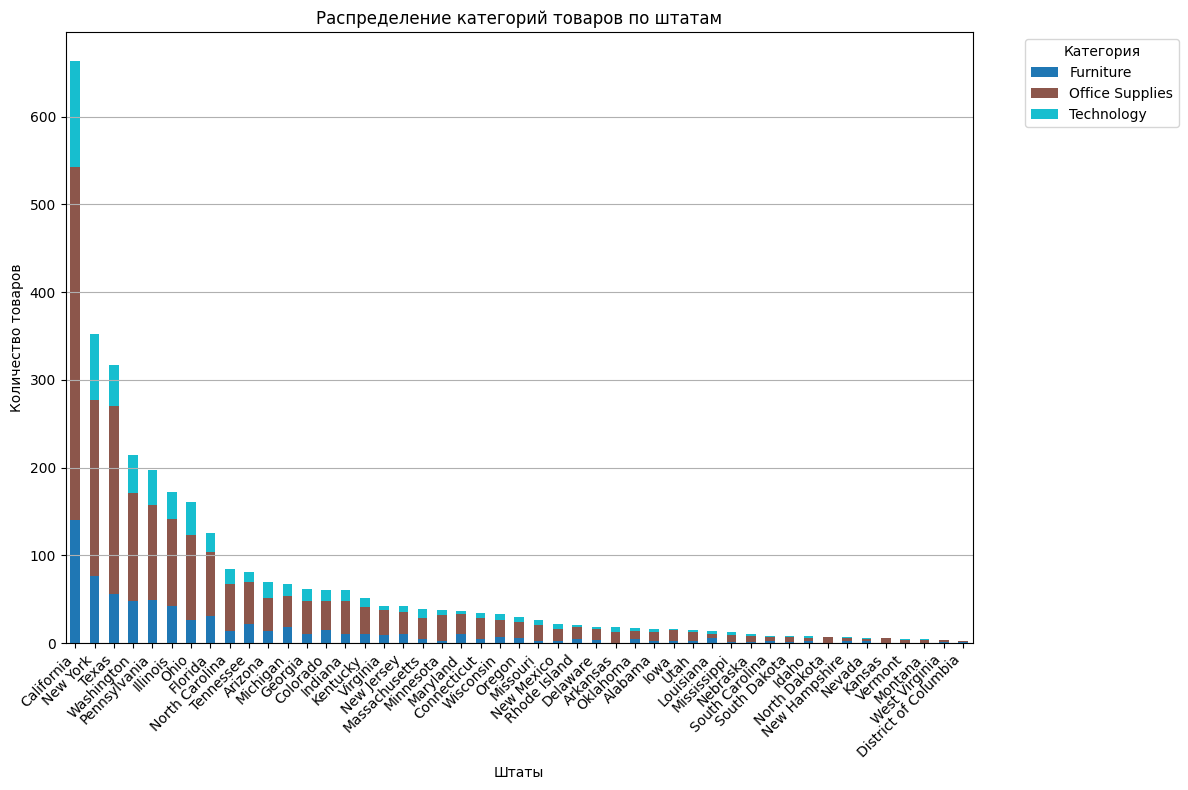

In [ ]:
# изучить распределение категорий внутри городов (штатам)
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что вы уже загрузили данные в DataFrame df
# df = pd.read_csv('ваш_файл.csv')  # Пример загрузки данных

# Подсчитываем количество товаров в каждой категории для каждого штата
category_distribution = df.groupby(['state', 'category']).size().unstack(fill_value=0)

# Сортируем по убыванию общего количества товаров в каждом штате
category_distribution['Total'] = category_distribution.sum(axis=1)
category_distribution = category_distribution.sort_values(by='Total', ascending=False).drop('Total', axis=1)

# Печатаем результат для проверки
print(category_distribution)

# Настройка цвета для каждой категории
colors = plt.cm.get_cmap('tab10', len(category_distribution.columns))

# Построение диаграммы
category_distribution.plot(kind='bar', stacked=True, color=colors(range(len(category_distribution.columns))), figsize=(12, 8))

plt.title('Распределение категорий товаров по штатам')
plt.xlabel('Штаты')
plt.ylabel('Количество товаров')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

# Показать диаграмму
plt.tight_layout()
plt.show()

<ipython-input-44-e2b8f8acde04>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(category_distribution.columns))


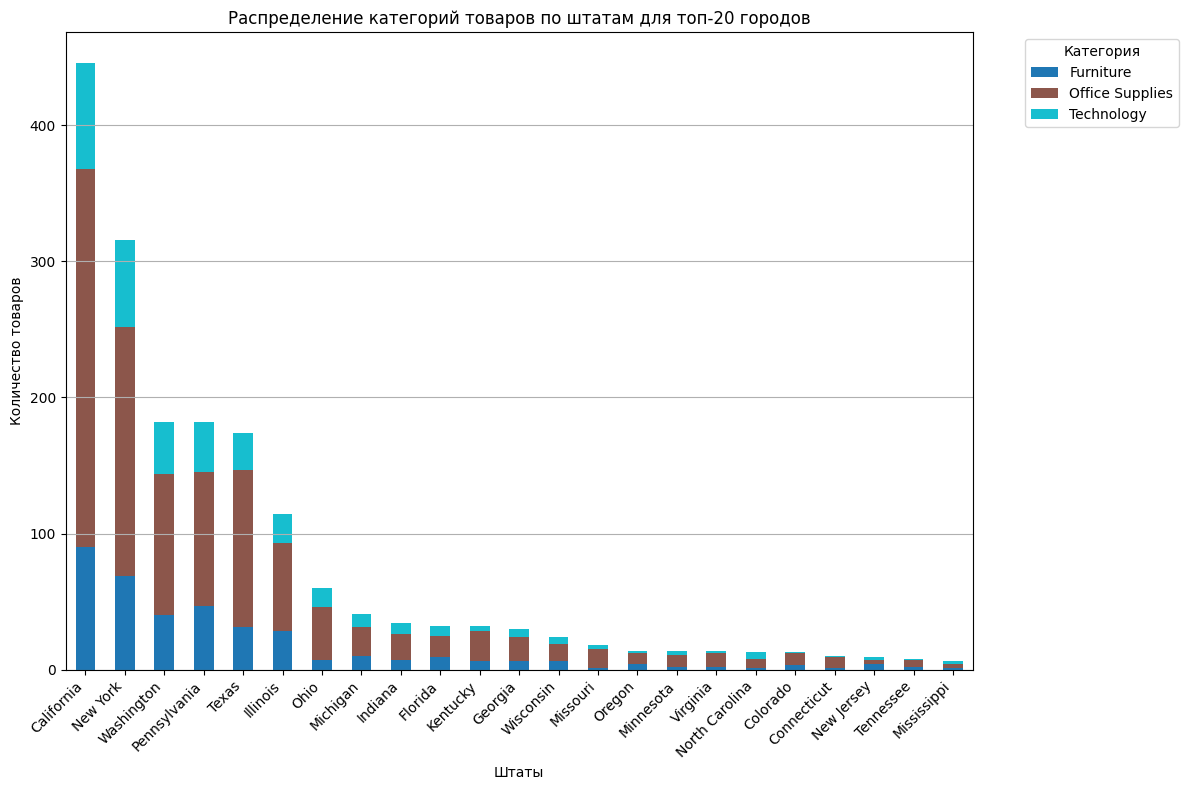

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что вы уже загрузили данные в DataFrame df
# df = pd.read_csv('ваш_файл.csv')  # Пример загрузки данных

# Подсчитываем количество заказов (или товаров) в каждом городе
city_counts = df['city'].value_counts()

# Получаем топ-20 городов
top_20_cities = city_counts.head(20).index.tolist()

# Фильтруем DataFrame для топ-20 городов
filtered_df = df[df['city'].isin(top_20_cities)]

# Подсчитываем количество товаров в каждой категории для каждого штата из топ-20 городов
category_distribution = filtered_df.groupby(['state', 'category']).size().unstack(fill_value=0)

# Сортируем по убыванию общего количества товаров в каждом штате
category_distribution['Total'] = category_distribution.sum(axis=1)
category_distribution = category_distribution.sort_values(by='Total', ascending=False).drop('Total', axis=1)

# Печатаем результат для проверки
#print(category_distribution)

# Настройка цвета для каждой категории
colors = plt.cm.get_cmap('tab10', len(category_distribution.columns))

# Построение диаграммы
category_distribution.plot(kind='bar', stacked=True, color=colors(range(len(category_distribution.columns))), figsize=(12, 8))

plt.title('Распределение категорий товаров по штатам для топ-20 городов')
plt.xlabel('Штаты')
plt.ylabel('Количество товаров')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

# Показать диаграмму
plt.tight_layout()
plt.show()

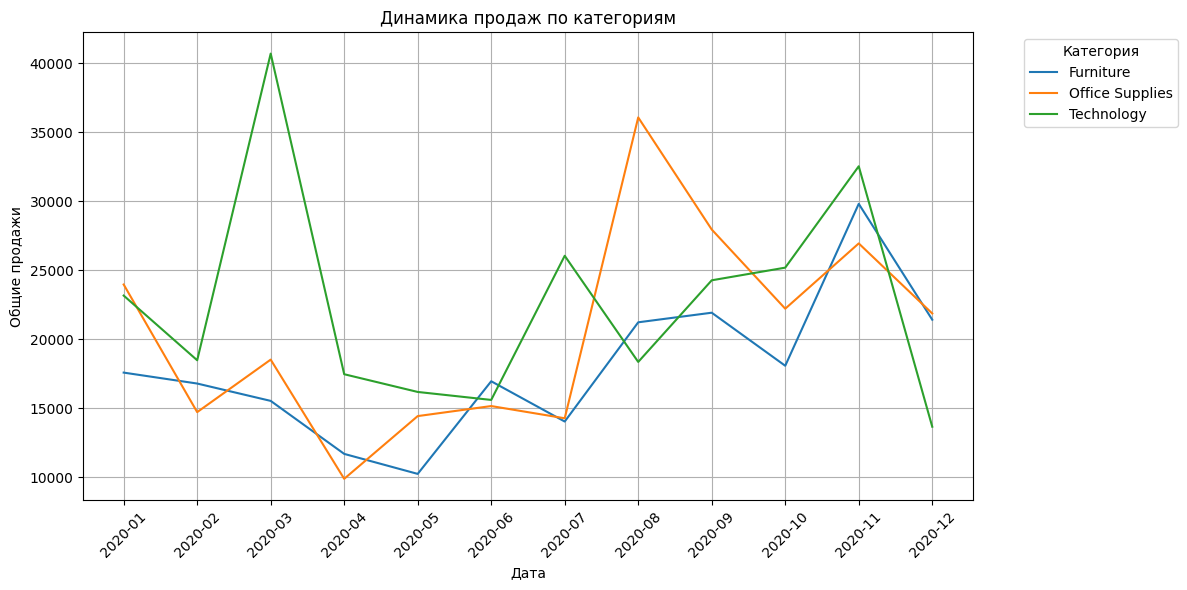

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что ваш DataFrame называется df
# Преобразуем столбец orderDate в формат datetime
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Извлекаем год и месяц для агрегации
df['year_month'] = df['orderDate'].dt.to_period('M')

# Группируем данные по категории и времени, суммируя продажи
sales_by_category = df.groupby(['year_month', 'category'])['sales'].sum().reset_index()

# Пивотируем таблицу, чтобы каждая категория стала отдельной колонкой
sales_pivot = sales_by_category.pivot(index='year_month', columns='category', values='sales').fillna(0)

# Строим линейные графики
plt.figure(figsize=(12, 6))
for category in sales_pivot.columns:
    plt.plot(sales_pivot.index.astype(str), sales_pivot[category], label=category)

# Настройки графика
plt.title('Динамика продаж по категориям')
plt.xlabel('Дата')
plt.ylabel('Общие продажи')
plt.xticks(rotation=45)
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()

# Показываем график
plt.show()

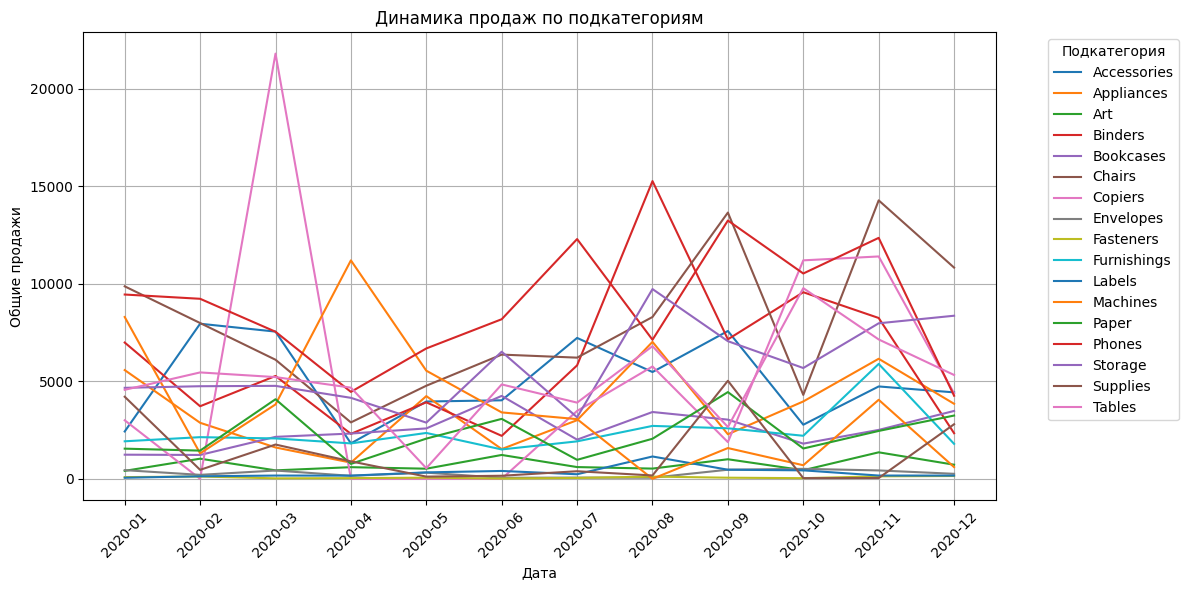

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df['orderDate'] = pd.to_datetime(df['orderDate'])

# Извлекаем год и месяц для агрегации
df['year_month'] = df['orderDate'].dt.to_period('M')

# Группируем данные по категории и времени, суммируя продажи
sales_by_category = df.groupby(['year_month', 'sub-category'])['sales'].sum().reset_index()

# Пивотируем таблицу, чтобы каждая категория стала отдельной колонкой
sales_pivot = sales_by_category.pivot(index='year_month', columns='sub-category', values='sales').fillna(0)

# Строим линейные графики
plt.figure(figsize=(12, 6))
for category in sales_pivot.columns:
    plt.plot(sales_pivot.index.astype(str), sales_pivot[category], label=category)

# Настройки графика
plt.title('Динамика продаж по подкатегориям')
plt.xlabel('Дата')
plt.ylabel('Общие продажи')
plt.xticks(rotation=45)
plt.legend(title='Подкатегория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()

# Показываем график
plt.show()

# Выводы
Проведено исследование продаж маркетплейса Amazon за 2022 г.
В исследовании участвовало 3312 заказов. Этого мало, чтобы выявить явные преобладания продаж того или иного товара. А также для выявления повторных покупок одним и тем же клиентов. Тем не менее, некоторые выводы можно сделать.
Наибольшее количество клиентов находится в Калифорнии.
Наибольшее количество клиентов приходится на Нью-Йорк и Лос-Анджелес
За рассмотренный период динамика заказов положительная, со всплеском в марте, возможно к празднику 8 марта, в сентябре – подготовка к школе и в ноябре – подготовка к новому году/рождеству.
В каждой стране примерно одинаковые доли продаж основных категорий товаров.
Наиболее популярная подкатегория – телефоны, затем идут стулья и комплектующие


In [ ]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка